# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables




This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

## **PACE stages**


<div>
<img src="./download_regression_modeling.png" alt="Drawing" style="width: 500px;" />
</div>

## **Pace: Plan**

In this stage, consider the following:

### Understand the business scenario and problem


The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset


The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.


- Who are your stakeholders for this project?
    - The stakeholders for this project are the senior leadership team of Salifort Motors.                      
- What are you trying to solve or accomplish?
    - The senior leadership team at Salifort Motors would like to know how to increase employee retention. My goal is to make a model that is able to accurately predict employees who leave the company.
- What are your initial observations when you explore the data?
    - My initial observations of the data are:
        - As employee satisfaction decreases, they are more likely to leave
        - As employee tenure increases, they are less likely to leave
        - Overworked employees are more likely to leave
        - Underpaid employees are more likely to leave
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Pandas documentation
    - Project/course documentation
- Do you have any ethical considerations in this stage?


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
## Importing Packages ##
# Packages for data manipulation
import numpy as np
import pandas as pd
from time import time

# Packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("bright")
sns.set_style("darkgrid")
sns.set_context("notebook")

# Allows all columns to be displayed
pd.set_option('display.max_columns', None)

# Packages for data modeling
from sklearn.model_selection import  train_test_split, GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Packages for Calculating Metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Package to plot feature importance
from xgboost import plot_importance

# Package to save Model
import pickle as pkl

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'Department': 'department', 'time_spend_company': 'company_tenure'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'company_tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
company_tenure           0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [6]:
# Check for duplicates
duplicates = df0.duplicated()
duplicates.sum()

3008

In [7]:
# Inspect some rows containing duplicates as needed
df0[duplicates].head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,company_tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [8]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_1 = df0.drop_duplicates(keep='first', inplace=False)

# Display first few rows of new dataframe as needed
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,company_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

In [9]:
def make_x_boxplot(df, cols):
    """Accepts a dataframe and a list of columns to create a boxplot for each column"""
    import math
    count = len(cols)
    rows = math.ceil(count/2)
    fig, ax = plt.subplots(rows, 2, figsize=(14,rows*2))
    y=0
    for col in cols:
        i, j = divmod(y, 2)
        sns.boxplot(data=df, x=col, fliersize=1, ax=ax[i, j], hue='left')
        y = y+1
        ax[i, j].set_title(col+' box plot', fontsize=16)
    plt.tight_layout()
    plt.show()

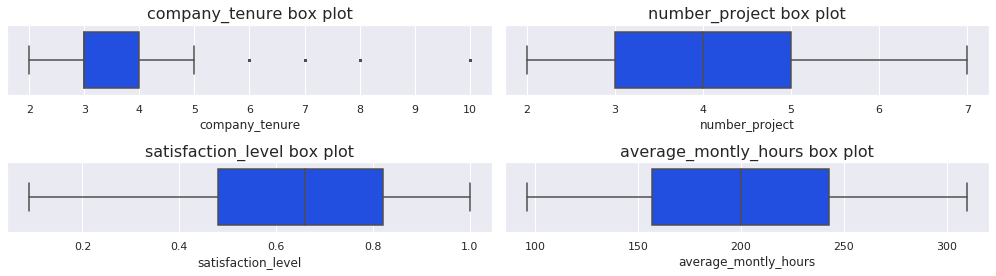

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
make_x_boxplot(df_1, ['company_tenure', 'number_project', 'satisfaction_level', 'average_montly_hours'])

In [48]:
# Determine the number of rows containing outliers
len(df_1[df_1["company_tenure"]>5])

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# PACE: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.



- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [61]:
# Get numbers of people who left vs. stayed
print(df_1["left"].value_counts())

# Get percentages of people who left vs. stayed
df_1["left"].value_counts(normalize=True)

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

#### Helper Functions

In [10]:
# Create a plot as needed
def make_hist_boxplot(df, col, bins=None):
    """Accepts a dataframe and a column to create a histogram and boxplot in the same figure."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    df_left = df[df['left']==1]
    df_stay = df[df['left']==0]
    title_1 = 'Histogram'
    title_2 = 'Boxplot'
    median_l = df_left[col].median()
    median_s = df_stay[col].median()
    plt.suptitle(col + " Plots; Left Median="+str(median_l)+" Stayed Median="+str(median_s), fontsize=14)
    
    if bins:
        sns.histplot(data=df, x=col, bins=bins, hue="left", ax=ax1, multiple="dodge")
        sns.boxplot(data=df, x=col, fliersize=1, hue="left", ax=ax2, color='steelblue')
    else:
        sns.histplot(data=df, x=col, ax=ax1, hue="left", multiple="dodge")
        sns.boxplot(data=df, x=col, fliersize=1, ax=ax2, hue="left", color='steelblue')
    
    ax1.set_title(title_1, fontsize=14, wrap=True)
    ax2.set_title(title_2, fontsize=14, wrap=True)
    plt.tight_layout()
    plt.show()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

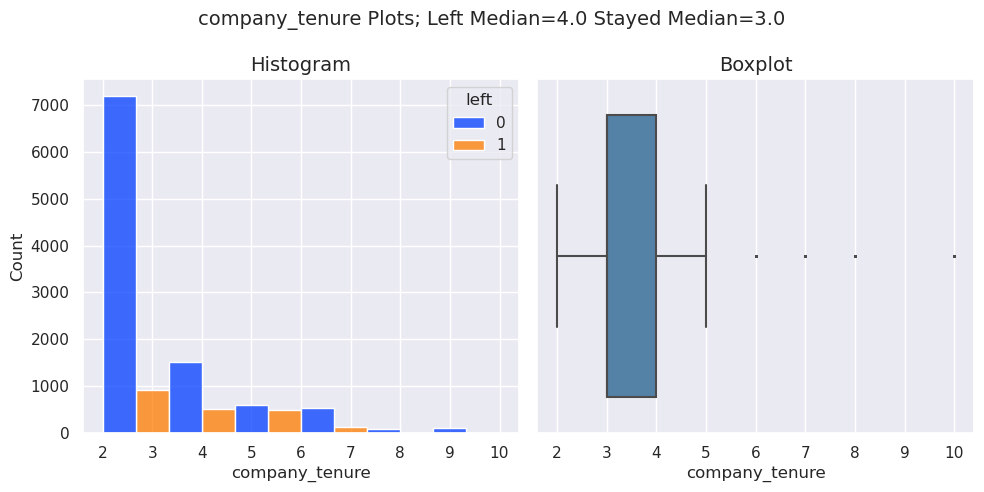

In [123]:
# Create a plot as needed
make_hist_boxplot(df_1, "company_tenure", bins=6)

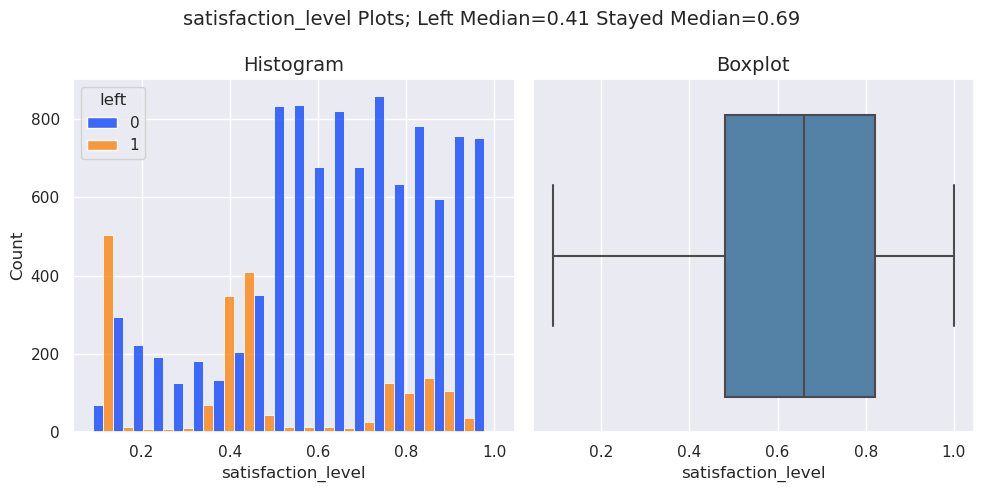

In [125]:
# Create a plot as needed
make_hist_boxplot(df_1, "satisfaction_level", bins=20)

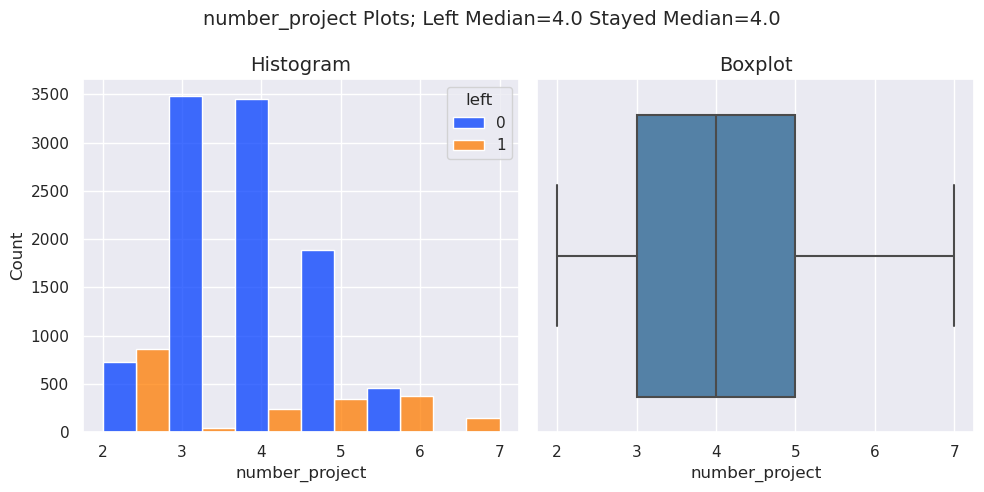

In [159]:
# Create a plot as needed
make_hist_boxplot(df_1, "number_project", bins=6)

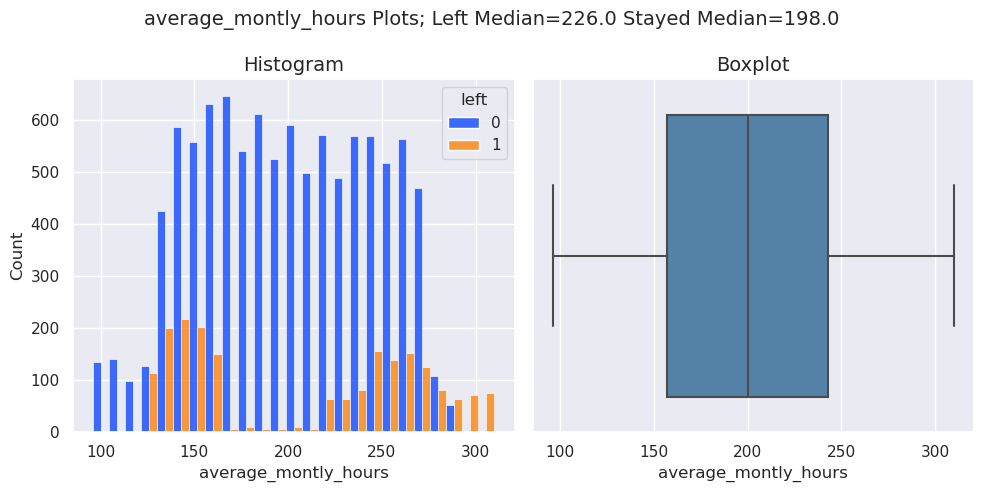

In [153]:
# Create a plot as needed
make_hist_boxplot(df_1, "average_montly_hours", bins=25)

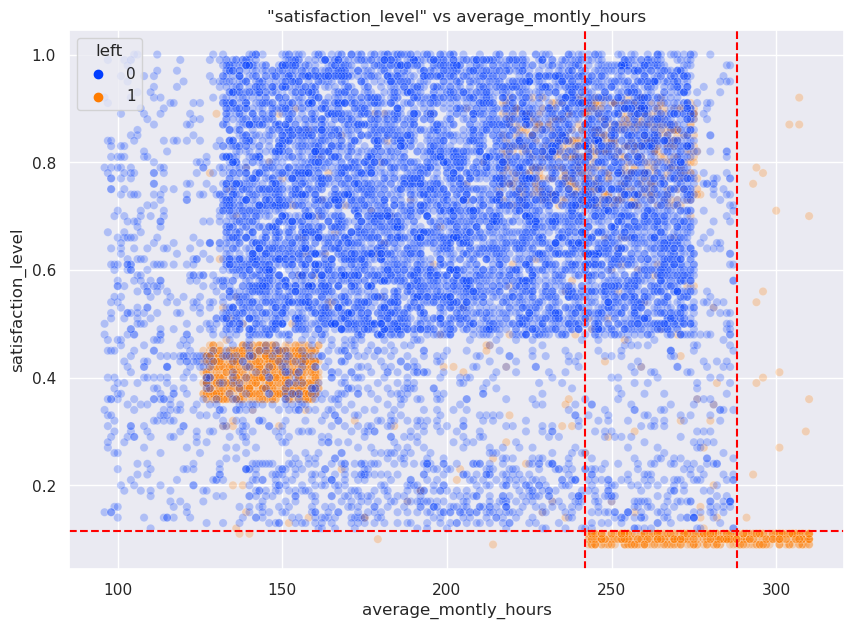

In [150]:
# Scatter plot
plt.figure(figsize=(10,7))
ax = sns.scatterplot(data=df_1, x="average_montly_hours", y="satisfaction_level", hue='left', alpha=0.25)
sns.move_legend(ax, "upper left")
plt.axvline(242, color='red', linestyle='--')
plt.axvline(288, color='red', linestyle='--')
plt.axhline(0.115, color='red', linestyle='--')
plt.title('"satisfaction_level" vs average_montly_hours');

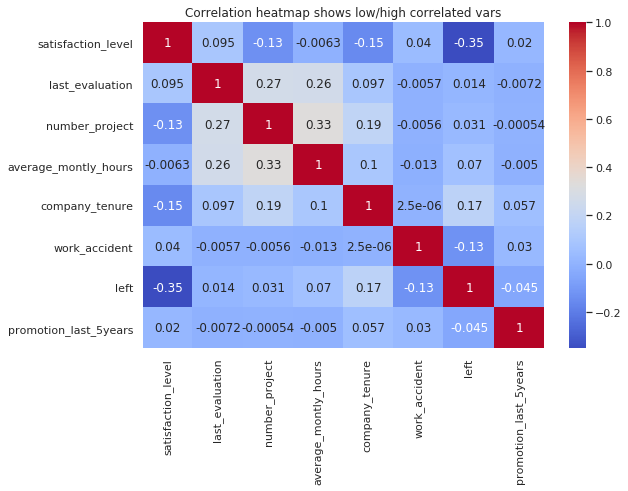

In [13]:
# Create a plot as needed
plt.figure(figsize=(9,6))
sns.heatmap(df_1.drop(columns=["salary","department"]).corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap shows low/high correlated vars')
plt.show();

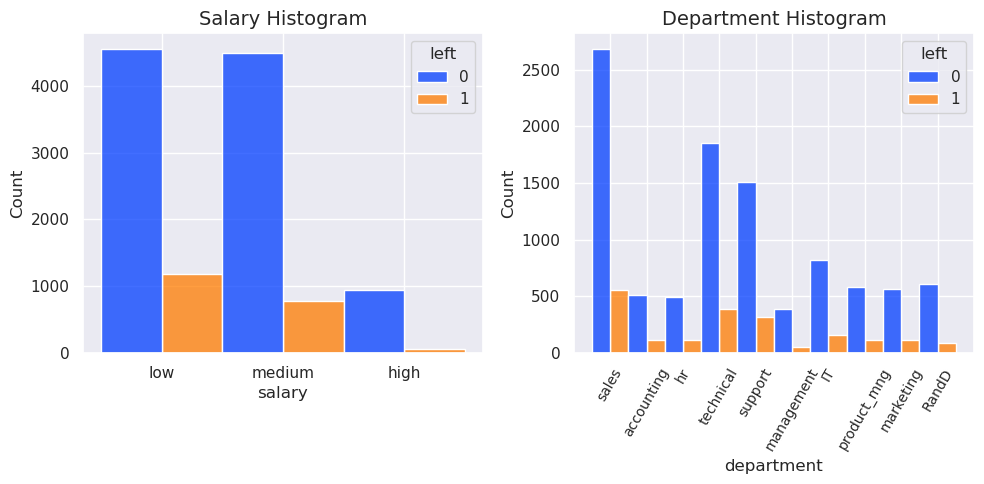

In [143]:
# Create a plot as needed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df_1, x="salary", bins=None, hue="left", ax=ax1, multiple="dodge")
sns.histplot(data=df_1, x="department", bins=None, hue="left", ax=ax2, multiple="dodge")
ax1.set_title("Salary Histogram", fontsize=14, wrap=True)
ax2.set_title("Department Histogram", fontsize=14, wrap=True)
plt.xticks(rotation=60, fontsize=10)
plt.tight_layout()
plt.show()

### Insights

1. From the correlation heatmap we can confirm there is no multicolinearity between features. Also there is a _slight_ negative correlation between `left` and `satisfaction_level`
2. Employees with 'high' salary have lower levels of turnover.
3. There doesnt seem to be a clear relation between employees leaving and the department they worked for.
4. Theres a group of employees who left that worked more than _242 hours_ a month with a satisfaction below _0.115_.
5. All employees that worked on **6+ projects** left.
6. As `company_tenure` decreases the amount of employees leaving increases, but company tenure has the most outliers.

# PACE: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions


**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

💭
### Reflect on these questions as you complete the constructing stage.


- Do you notice anything odd?
    - Nothing odd
- Which independent variables did you choose for the model and why?
    - All independent vars will be used, since there is no severe multicollinearity between them
- Are each of the assumptions met?
- How well does your model fit the data?
    - All the models fit the data very well except for LR
- Can you improve it? Is there anything you would change about the model?
    - The scores are in the 90s so not much improvement is required, but Feature Engineering could possibly improve the score
- Do you have any ethical considerations in this stage?
    - FNs are riskier than FP since the worst outcome for FNs would be loosing an employee and the worst outcome for FPs is wasting resources in retaining an employee not at risk for leaving.


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal of this task is to predict which employees leave. This is a binary classification with the `left` column as the target where employees could either be 1 (have left) or 0 (have not left).

### Identify the types of models most appropriate for this task.

These are the following models that will be used for training and the best model will be selected overall: 
1. Logistic Regression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XGBClassifier

### Helper Fuctions

In [141]:
def dataset_split(X, y, validation_set=True):
    if validation_set:
        X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, 
                                                      train_size=0.8,
                                                      random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                          train_size=0.75,
                                                          random_state=42)
        return  X_train, X_val, X_test, y_train, y_val, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                            train_size=0.75,
                                                            random_state=42)
        return  X_train, X_test, y_train, y_test

def create_GridSearch(model, cv_params, xTrain, yTrain, cv=5, refit:str="f1"):
    """Returns a fitted GridSearchCV model with the training data.
    Arguments:
        model: selected estimator object
        cv_params: dict of parameter names (str) lists of parameter settings to try
        xTrain: X (input) data of training dataset
        yTrain: y (target) data of training dataset
        cv: Determines cross-validation splitting strategy, defaults to '5'
        refit (str): can be precision, recall, f1, or accuracy
    """
    gs = GridSearchCV(model, param_grid=cv_params, cv=cv, refit=refit, verbose=1,
                      scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs=-1)
    gs.fit(xTrain, yTrain)
    print("Best Params: ", gs.best_params_)
    print("Best Score: ", gs.best_score_)
    return gs

def make_GridSearchCV_results(model_name:str, model_object, metric:str, time=None):
    '''
    Arguments:
        model_name (str): identifier for the model displayed in the output table
        model_object: a fitted GridSearchCV object
        metric (str): can be 'precision', 'recall', 'f1', or 'accuracy'

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metrics_map = {'accuracy': 'mean_test_accuracy',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1'}
    
    metric_id = metrics_map[metric]
    
    # Get all the results from the CV and put them in a df
    results_df = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_row = results_df.iloc[results_df[metric_id].idxmax()]
    
    # Extract Accuracy, precision, recall, and f1 score from that row
    acc = best_row["mean_test_accuracy"]
    prec = best_row["mean_test_precision"]
    recall = best_row["mean_test_recall"]
    f1 = best_row["mean_test_f1"]
    
    # Create table of results
    return pd.DataFrame({"Model": [model_name],
                        "Accuracy": [acc],
                        "Precision": [prec],
                        "Recall": [recall],
                        "F1": [f1],
                        "Time": [time]})
    
def make_results(model_name, y_actual, y_pred, time=None):
    return pd.DataFrame({"Model": [model_name],
                        "Accuracy": [accuracy_score(y_actual, y_pred)],
                        "Precision": [precision_score(y_actual, y_pred)],
                        "Recall": [recall_score(y_actual, y_pred)],
                        "F1": [f1_score(y_actual, y_pred)],
                        "Time": [time]})
    
def plot_conf_matrix(yTest, yPred, title:str, labels=None):
    """Displays a plot of a model's confusion matrix.
    Arguments:
        yTest: actual y values
        yPred: predicted y values
        title (str): title for confusion matrix
        labels: array of strings for confusion matrix labels
    """
    # Construct the confusion matrix for your predicted and test values.
    conf_matrix = confusion_matrix(yTest, yPred, labels=labels)
    
    # Create the display for your confusion matrix.
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=labels)
    
    # Plot the visual in-line.
    fig, ax = plt.subplots(figsize=(10,3))
    disp.plot(ax=ax, values_format='d')
    plt.title(title)
    plt.show()

def plot_conf_matrices(models_updated, y_act, labels=None):
    """Displays a plot of all models confusion matrices.
    Arguments:
        models_updated: Array of Models validation data.
        y_act: Actual values for y.
        labels: array of strings for confusion matrix labels.
    """
    fig, ax = plt.subplots(2, 2, figsize=(7,7))
    
    y = 0
    for model in models_updated:
        i, j = divmod(y, 2)
        title = model['model_name']
        yPred = model['val_preds']
        ax[i][j].set_title(title, fontsize=16)

        # Construct the confusion matrix for your predicted and test values.
        conf_matrix = confusion_matrix(y_act, yPred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=labels)
        disp.plot(ax=ax[i][j], values_format='d')
        y = y+1
    plt.suptitle("Models Confusion Matrices of Validation Results", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    
def plot_feature_importances_top_x(models_updated, features, top=10):
    """Displays a plot of all models' feature importances.
    Arguments:
        models_updated: Array of Models validation data.
    """
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    y = 0
    for model in models_updated:
        i, j = divmod(y, 2)
        # Get Data
        title = model['model_name']
        model = model['model_obj']
        if title in ["XGBC", "XGBB"]:
            # create importances for XGBoost Models
            importances=pd.DataFrame(list(model.get_booster().get_fscore().items()),
                                     columns=['Features','Importance'])
            importances = importances.sort_values('Importance', ascending=False)
        else:
            importances = pd.DataFrame({"Features": features, 
                                    "Importance": model.feature_importances_})
            importances = importances.sort_values(by=["Importance"], ascending=False)
        median = importances['Importance'].median()
        
        # Plot bar plot
        sns.barplot(data=importances.head(top), x="Features", y="Importance", ax=ax[i][j])
        
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(80)
        ax[i][j].set_title(title, fontsize=16)
        
        models_updated[y]["val_importance"] = importances
        y=y+1
    plt.suptitle("Models Feature Importance", fontsize=14)
    plt.tight_layout()
    plt.show()
    return models_updated

### Modeling

Add as many cells as you need to conduct the modeling process.

In [112]:
# Experiment Setup
LR = LogisticRegression(random_state=0)
lr_params = {'max_iter': [None, 500],
            'penalty': [None, 'l1', 'l2', 'elasticnet'],
            'class_weight': [None, 'balanced']}
DTC = DecisionTreeClassifier(random_state=0)
dtc_params = {'max_depth': [None, 5, 10, 15, 20, 50], 
             'min_samples_leaf': [2, 3, 5, 10, 15, 50], 
             'min_samples_split': [0.001, 0.01, 2], 
             'max_features': ["sqrt", "log2", None]}
RFC = RandomForestClassifier(random_state=0)
rfc_params = {'n_estimators': [20, 50, 100, 300], 
             'max_depth': [None, 5, 10, 15, 20, 50], 
             'min_samples_leaf': [2, 3, 5, 10, 15, 50], 
             'min_samples_split': [0.001, 0.01], 
             'max_features': ["sqrt"],
             'max_samples': [0.25, 0.5, 0.75, 0.9]}
XGBC = XGBClassifier(random_state=0)
xgbc_params = {'max_depth': [5, 10, 15, 50, 100],
              'min_child_weight': [3, 5, 6],
              'learning_rate': [0.01, 0.0001, 0.005],
              'n_estimators': [10, 25, 50, 100, 300]}
XGBB = XGBClassifier(objective='binary:logistic', random_state=0)
xgbb_params = {'max_depth': [10, 15, 50, 100],
              'min_child_weight': [3, 5, 6],
              'learning_rate': [0.01, 0.005],
              'n_estimators': [25, 50, 100, 300, 500]}
Final_Results = pd.DataFrame()

#### Data Pre-Processing

In [13]:
### Logistic Regression Data Pre-processing ###
# For LR we need to convert all categorical data to numeric
df_encoded = df_1.copy()

# 1. Convert Salary to ordinal
df_encoded['salary2'] = np.where((df_encoded['salary'] == "low"), 0, df_encoded['salary'])
df_encoded['salary2'] = np.where((df_encoded['salary2'] == "medium"), 1, df_encoded['salary2'])
df_encoded['salary2'] = np.where((df_encoded['salary2'] == "high"), 2, df_encoded['salary2'])
df_encoded = df_encoded.astype({"salary2": int})
df_encoded[['salary2', 'salary']].head()

,salary2,salary
0,0,low
1,1,medium
2,1,medium
3,0,low
4,0,low


In [14]:
df_encoded.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
company_tenure             int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
salary2                    int64
dtype: object

In [15]:
# 2. Covert Department using pd.dummies
df_dummies = pd.get_dummies(df_encoded['department'], drop_first=False)

In [16]:
## Create dict to rename cols
replace_dict = dict()
for c in df_dummies.columns:
    replace_dict.update({c: "dept_"+c})

df_dummies = df_dummies.rename(columns=replace_dict)
df_encoded = pd.concat([df_encoded, df_dummies], axis=1)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,company_tenure,work_accident,left,promotion_last_5years,department,salary,salary2,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0


In [17]:
### Logistic Regression Data Splitting ###
X = df_encoded.drop(columns=["left", "salary", "department"])
y = df_encoded["left"]
X_train, X_val, X_test, y_train, y_val, y_test = dataset_split(X, y, validation_set=True)
print(len(X_train), len(X_val), len(X_test))

7194 2398 2399


#### 1. Logistic Regression

In [18]:
%%time
### Logistic Regression Model ###
lr_gridsearch = create_GridSearch(LR, lr_params, X_train, y_train, cv=5, refit="f1")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params:  {'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2'}
Best Score:  0.5352231597863336
CPU times: user 730 ms, sys: 311 ms, total: 1.04 s
Wall time: 3.8 s


In [19]:
### Logistic Regression Results ###
lr_res = make_GridSearchCV_results("LR", lr_gridsearch, "f1", 3.8)
lr_res

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8


In [20]:
Final_Results = pd.concat([Final_Results, lr_res])
Final_Results

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8


#### 2. DecisionTreeClassifier

In [21]:
%%time
### DecisionTreeClassifier ###
dtc_gridsearch = create_GridSearch(DTC, dtc_params, X_train, y_train, cv=5, refit="f1")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Params:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 0.01}
Best Score:  0.9433355329328765
CPU times: user 2.65 s, sys: 640 ms, total: 3.29 s
Wall time: 4.6 s


In [22]:
dtc_res = make_GridSearchCV_results("DTC", dtc_gridsearch, "f1", 4.6)
dtc_res

,Model,Accuracy,Precision,Recall,F1,Time
0,DTC,0.981929,0.982142,0.90795,0.943336,4.6


In [23]:
Final_Results = pd.concat([Final_Results, dtc_res])
Final_Results

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8
0,DTC,0.981929,0.982142,0.907950,0.943336,4.6


#### 3. RandomForestClassifier

In [24]:
%%time
### RandomForestClassifier ###
rfc_gridsearch = create_GridSearch(RFC, rfc_params, X_train, y_train, cv=5, refit="f1")

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Params:  {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 0.001, 'n_estimators': 300}
Best Score:  0.9420876119107401
CPU times: user 28.3 s, sys: 2.77 s, total: 31.1 s
Wall time: 5min 7s


In [25]:
rfc_res = make_GridSearchCV_results("RFC", rfc_gridsearch, "f1", (5*60)+7)
rfc_res

,Model,Accuracy,Precision,Recall,F1,Time
0,RFC,0.981651,0.986528,0.902092,0.942088,307


In [26]:
Final_Results = pd.concat([Final_Results, rfc_res])
Final_Results

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8
0,DTC,0.981929,0.982142,0.907950,0.943336,4.6
0,RFC,0.981651,0.986528,0.902092,0.942088,307.0


#### 4. XGBClassifier

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
%%time
### XGBClassifier ###
xgbc_gridsearch = create_GridSearch(XGBC, xgbc_params, X_train, y_train, cv=5, refit="f1")

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best Params:  {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 300}
Best Score:  0.9382063608976903
CPU times: user 31.6 s, sys: 502 ms, total: 32.1 s
Wall time: 1min 8s


In [28]:
xgbc_res = make_GridSearchCV_results("XGBC", xgbc_gridsearch, "f1", 68)
xgbc_res

,Model,Accuracy,Precision,Recall,F1,Time
0,XGBC,0.980261,0.975129,0.904603,0.938206,68


In [29]:
Final_Results = pd.concat([Final_Results, xgbc_res])
Final_Results

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8
0,DTC,0.981929,0.982142,0.907950,0.943336,4.6
0,RFC,0.981651,0.986528,0.902092,0.942088,307.0
0,XGBC,0.980261,0.975129,0.904603,0.938206,68.0


#### 5. XGBClassification with objecive set

In [30]:
%%time
### XGBClassification with objecive set ###
xgbb_gridsearch = create_GridSearch(XGBB, xgbb_params, X_train, y_train, cv=5, refit="f1")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Params:  {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 500}
Best Score:  0.9403026214813011
CPU times: user 54.2 s, sys: 912 ms, total: 55.1 s
Wall time: 1min 30s


In [31]:
xgbb_res = make_GridSearchCV_results("XGBB", xgbb_gridsearch, "f1", 90)
xgbb_res

,Model,Accuracy,Precision,Recall,F1,Time
0,XGBB,0.980956,0.977918,0.906276,0.940303,90


In [32]:
Final_Results = pd.concat([Final_Results, xgbb_res])
Final_Results

,Model,Accuracy,Precision,Recall,F1,Time
0,LR,0.765082,0.398863,0.814226,0.535223,3.8
0,DTC,0.981929,0.982142,0.907950,0.943336,4.6
0,RFC,0.981651,0.986528,0.902092,0.942088,307.0
0,XGBC,0.980261,0.975129,0.904603,0.938206,68.0
0,XGBB,0.980956,0.977918,0.906276,0.940303,90.0


### Model Validation

#### Run Model Validation

In [33]:

def run_model_validation(models, X_val, y_val):
    final_res = pd.DataFrame()
    i=0
    for model in models:
        model_obj = model['model_obj']
        model_name = model['model_name']
        print("Fitting Model: ", model_name)

        start_time = time()
        model_obj.fit(X_val, y_val)
        end_time = time()
        
        y_pred = model_obj.predict(X_val)
        res = make_results(model_name+"_val", y_val, y_pred, end_time-start_time)
        final_res = pd.concat([final_res, res])
        
        models[i]["val_preds"] = y_pred
        models[i]["val_scores"] = res
        i = i+1
    return final_res, models

In [34]:
models = [{"model_name": "DTC",
           "model_obj": DTC.set_params(**dtc_gridsearch.best_params_),
           "val_preds": [],
           "val_scores": []},
          {"model_name": "RFC",
           "model_obj": RFC.set_params(**rfc_gridsearch.best_params_),
           "val_preds": [],
           "val_scores": []},
          {"model_name": "XGBC",
           "model_obj": XGBC.set_params(**xgbc_gridsearch.best_params_),
           "val_preds": [],
           "val_scores": []},
          {"model_name": "XGBB",
           "model_obj": XGBB.set_params(**xgbb_gridsearch.best_params_),
           "val_preds": [],
           "val_scores": []}]
val_results, models_updated = run_model_validation(models, X_val, y_val)
val_results

Fitting Model:  DTC
Fitting Model:  RFC
Fitting Model:  XGBC
Fitting Model:  XGBB


,Model,Accuracy,Precision,Recall,F1,Time
0,DTC_val,0.984987,0.983957,0.924623,0.953368,0.008815
0,RFC_val,0.985822,0.986631,0.927136,0.955959,0.653749
0,XGBC_val,0.980400,0.963061,0.917085,0.939511,0.853912
0,XGBB_val,0.984987,0.986559,0.922111,0.953247,1.810806


#### Model Validation Results

In [35]:
All_Results = pd.concat([Final_Results, val_results])
All_Results.sort_values(["Time", "F1"], ascending=[True, False])

,Model,Accuracy,Precision,Recall,F1,Time
0,DTC_val,0.984987,0.983957,0.924623,0.953368,0.008815
0,RFC_val,0.985822,0.986631,0.927136,0.955959,0.653749
0,XGBC_val,0.980400,0.963061,0.917085,0.939511,0.853912
0,XGBB_val,0.984987,0.986559,0.922111,0.953247,1.810806
0,LR,0.765082,0.398863,0.814226,0.535223,3.800000
0,DTC,0.981929,0.982142,0.907950,0.943336,4.600000
0,XGBC,0.980261,0.975129,0.904603,0.938206,68.000000
0,XGBB,0.980956,0.977918,0.906276,0.940303,90.000000
0,RFC,0.981651,0.986528,0.902092,0.942088,307.000000


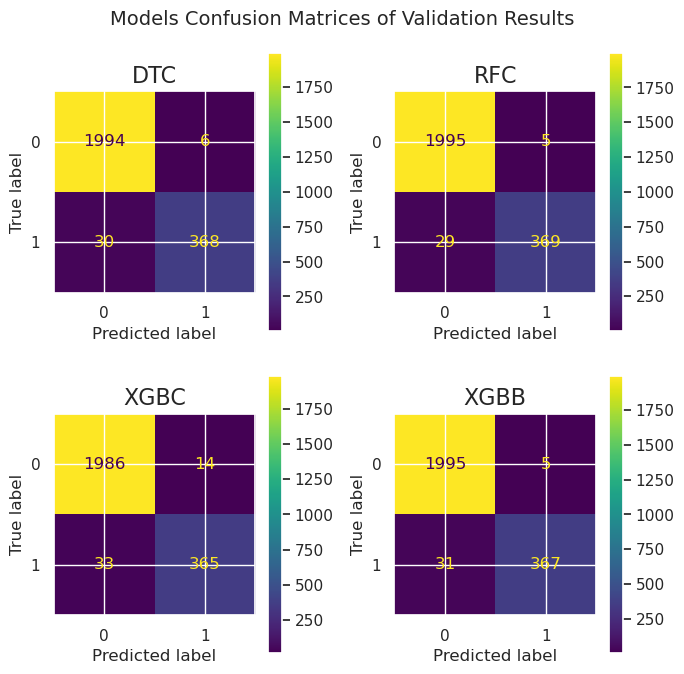

In [42]:
plot_conf_matrices(models_updated, y_val, labels=None)

These results are consistent with the metrics calculated, since *TPs & TPs >> FPs & FNs*. The metrics for all models are similar which is also shown in the figure above. Also, the fact that the data is imbalanced explains why the *TPs < TNs*. 

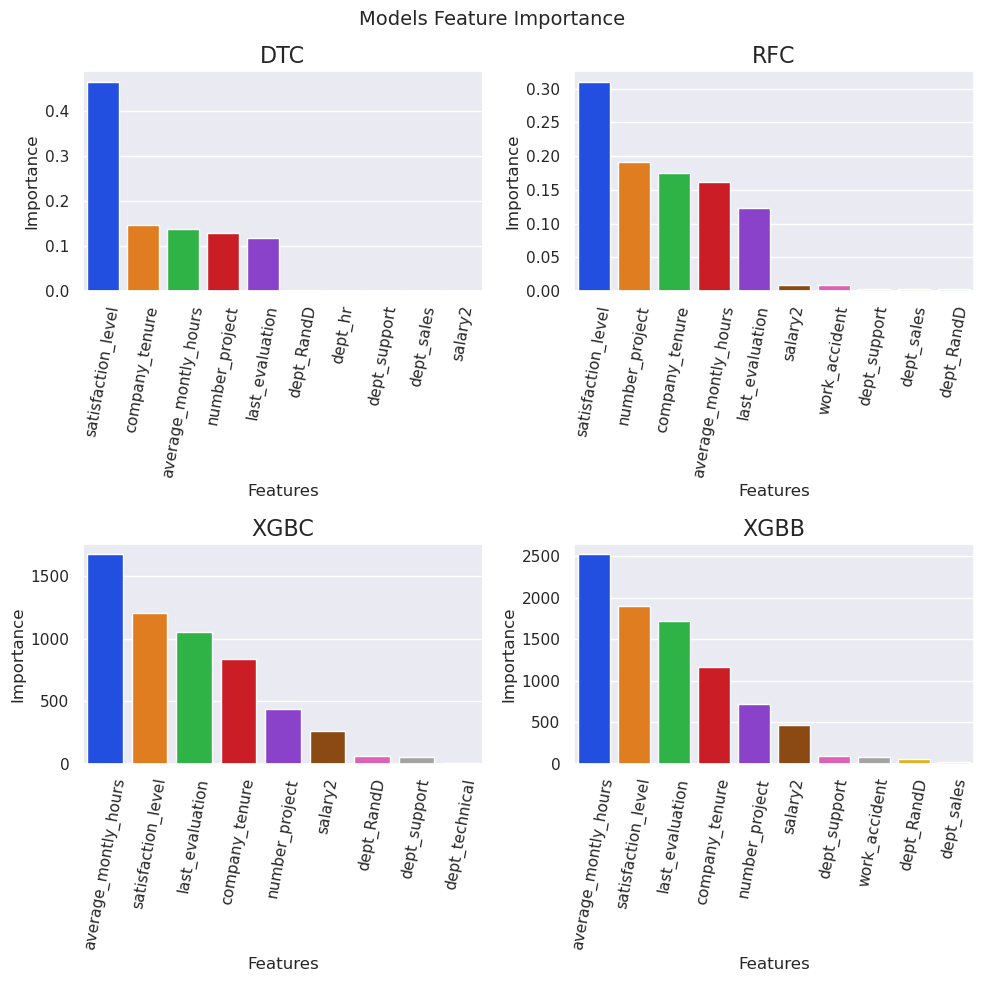

In [43]:
models_updated = plot_feature_importances_top_x(models_updated, X.columns, top=10)

##### Agreggating Feature Importances across all models

In [103]:
# Get importance dfs of all models
imp_dt = models_updated[0]['val_importance']
imp_rf = models_updated[1]['val_importance']
imp_xgb1 = models_updated[2]['val_importance']
imp_xgbb = models_updated[3]['val_importance']

# Normalize the XGBoost models' Importances to be (0, 1)
imp_xgb1["Importance_norm"] = (imp_xgb1["Importance"] - imp_xgb1["Importance"].min()) / (imp_xgb1["Importance"].max() - imp_xgb1["Importance"].min())
imp_xgbb["Importance_norm"] = (imp_xgbb["Importance"] - imp_xgbb["Importance"].min()) / (imp_xgbb["Importance"].max() - imp_xgbb["Importance"].min())

# set up DF for results and vars to get results
features = X.columns
feature_imp_sum = pd.DataFrame({"Features": features, "Importance": np.zeros(len(features))})
i = 0
# Iterate through the features to get importances from each model, sum them and save to results DF
for f in features:
    # Check Decision Tree Model if 'f' feature is ranked
    dt = 0
    if f in imp_dt["Features"].values:
        # if Feature is ranked, get row index
        idx = imp_dt.index[imp_dt['Features'] == f].tolist()[0]
        # use row index to get importance value
        dt = imp_dt.loc[imp_dt["Features"] == f]["Importance"][idx]
    # Check Random Forest Model if 'f' feature is ranked
    rf = 0
    if f in imp_rf["Features"].values:
        # if Feature is ranked, get row index
        idx = imp_rf.index[imp_rf['Features'] == f].tolist()[0]
        # use row index to get importance value
        rf = imp_rf.loc[imp_rf["Features"] == f]["Importance"][idx]
    # Check XGBClassification Model if 'f' feature is ranked
    xgb = 0
    if f in imp_xgb1["Features"].values:
        # if Feature is ranked, get row index
        idx = imp_xgb1.index[imp_xgb1['Features'] == f].tolist()[0]
        # use row index to get importance value
        xgb = imp_xgb1.loc[imp_xgb1["Features"] == f]["Importance_norm"][idx]
    # Check XGBB Model if 'f' feature is ranked
    xgbb = 0
    if f in imp_xgbb["Features"].values:
        # if Feature is ranked, get row index
        idx = imp_xgbb.index[imp_xgbb['Features'] == f].tolist()[0]
        # use row index to get importance value
        xgbb = imp_xgbb.loc[imp_xgbb["Features"] == f]["Importance_norm"][idx]
    # Sum all the importance values and save to the results DF
    feature_imp_sum.at[i, "Importance"] = dt+rf+xgb+xgbb
    i = i + 1
# Sort Importance from High to Low
feature_imp_sum = feature_imp_sum.sort_values("Importance", ascending=False)
feature_imp_sum.head(5)

,Features,Importance
3,average_montly_hours,2.299881
0,satisfaction_level,2.243660
1,last_evaluation,1.545507
4,company_tenure,1.279039
2,number_project,0.864296


#### Top Features across all Models

The top 5 importnant features that most models agree on are:
1. average_montly_hours
2. satisfaction_level
3. last_evaluation
4. company_tenure
5. number_project

These results are mostly expected, what was surprising was that salary was not used for predictions for the XGB models and had very low importance values in the other two models. The department columns also had very low importance values, but this was expected, as we saw in the Data Visualization section there was no relation between employee retention and the department they worked for.

#### Selecting Champion Model

The champion model is the **Decision Tree Classifier (DTC)** because it acheived the 2nd highest F1 Score (only 0.3% below the highest score) and only took 4.6s to train using GridSearchCV. The Random Forest Classifier had the best F1 Score, but it took over 5mins to train using GridSearchCV, which is not as scalable as the DTC model. 

In [110]:
#All_Results.sort_values("Time", ascending=True)
All_Results.sort_values("F1", ascending=False)

,Model,Accuracy,Precision,Recall,F1,Time
0,RFC_val,0.985822,0.986631,0.927136,0.955959,0.653749
0,DTC_val,0.984987,0.983957,0.924623,0.953368,0.008815
0,XGBB_val,0.984987,0.986559,0.922111,0.953247,1.810806
0,DTC,0.981929,0.982142,0.907950,0.943336,4.600000
0,RFC,0.981651,0.986528,0.902092,0.942088,307.000000
0,XGBB,0.980956,0.977918,0.906276,0.940303,90.000000
0,XGBC_val,0.980400,0.963061,0.917085,0.939511,0.853912
0,XGBC,0.980261,0.975129,0.904603,0.938206,68.000000
0,LR,0.765082,0.398863,0.814226,0.535223,3.800000


- DTC_val was quickest model with F1 score of 95.34% that took 0.0088s to run during validation. It was the 2nd fastest during training, taking just under 5s.
- RFC_val was not the fastes model, with F1 score of 95.60% that took 0.6s to run during validation. It was the slowest during training taking over 300s.
- XGB models took longer to train and validate and did not have the best scores. Interestingly, XGBB model had higher validation scores than training scores by ~1%
- LR had very poor F1 score during training, which is why it was not used during Validation which excludes it from being the champion model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
### Recall evaluation metrics


- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

💭
### Reflect on these questions as you complete the executing stage.



- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Decision Tree Model

In [138]:
# Train DT model from scratch with best performing params from GridSearchCV
start_time = time()
final_model_dt = DTC.set_params(**dtc_gridsearch.best_params_).fit(pd.concat([X_train, X_val]), 
                                                                     pd.concat([y_train, y_val]))
end_time = time()
# Get Feature Importances
final_model_feature_importance = pd.DataFrame({"Features": X.columns, 
                                    "Importance": final_model_dt.feature_importances_})
# Get prediction values for Test data
final_model_preds = final_model_dt.predict(X_test)

### Feature Importance

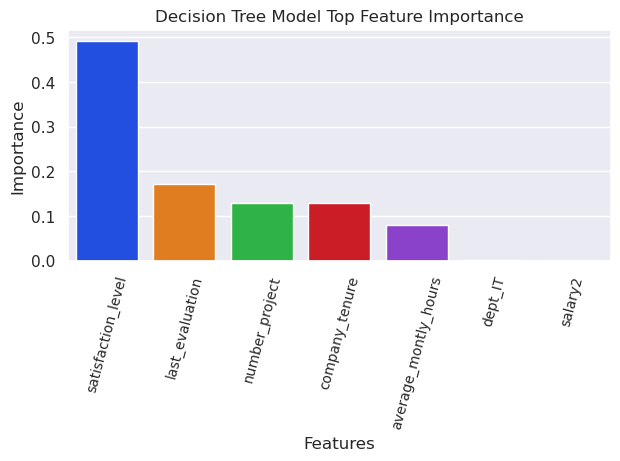

In [135]:
final_model_feature_importance = final_model_feature_importance.sort_values(by=["Importance"], ascending=False)
plt.figure(figsize=(7,3))
sns.barplot(data=final_model_feature_importance.head(7), x="Features", y="Importance")

plt.xticks(rotation=75, fontsize=10)
plt.title("Decision Tree Model Top Feature Importance")
plt.show()

In [145]:
final_model_feature_importance.sort_values(by=["Importance"], ascending=False)

,Features,Importance
0,satisfaction_level,0.492273
1,last_evaluation,0.170641
2,number_project,0.128495
4,company_tenure,0.128010
3,average_montly_hours,0.079744
8,dept_IT,0.000318
7,salary2,0.000200
16,dept_support,0.000120
10,dept_accounting,0.000101
11,dept_hr,0.000096


### Test Scores

In [139]:
final_model_scores = make_results("DT_test", y_test, final_model_preds, end_time-start_time)
final_model_scores

,Model,Accuracy,Precision,Recall,F1,Time
0,DT_test,0.986244,0.991914,0.924623,0.957087,0.036751


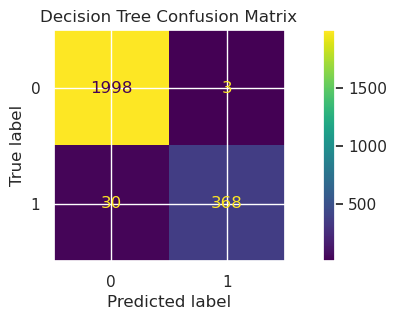

In [143]:
plot_conf_matrix(y_test, final_model_preds, "Decision Tree Confusion Matrix", labels=[None])

### Summary of model results


- **Scores:**
    - Accuracy: 98.62%
    - Precision: 99.19&
    - Recall: 92.46%
    - F1: 95.71%
- **TP: 368, TN: 1998, FP: 3, FN: 30**
    - FN are 10 times higher than FP, which means the model is more likely to incorrectly predict an employee is staying than incorrecly preticting an employee is leaving. Ideally we would like this reveresed. 
    - These proportions are consistent with the scores above and with the slight class imbalance (Model is more likely to predict 0 than 1 since it has seen more data in the '0' class than the '1' class).
- **Top Features:**
    -  Employee Satisfaction
    -  Last Evaluation
    -  Number of Projects
    -  Company Tenure
    -  Average Monthly Hours

### Conclusion, Recommendations, Next Steps


The model is already preforming very well without any feature engineering with an _F1 score_ of _95.71%_. To Improve the recall score, ideally we would like more data on employees that left but this may not be possible. Instead we could do some feature engineering with the top features.

#### Recommendations to Leadership  
- Put more effort in engagement for employees with tenure less than 7 year.
    - All employees who stayed for more than 7 years did not leave.
- Limit employees to work 3-4 projects at a time
    - Employees assigned to 3 projects had the lowest turnover rate, any more or any less resulted in an increase. Moreover all employees that worked 7 projects left
- Avoid overworking employees
    - All employees that worked more than 288 average monthly hours left
    - All employees that worked more than 242 average monthly hours and had a satisfaction score below 0.115 left

#### Next Steps  
- feature engineering such as average monthly hours per project(`average_montly_hours` / `number_project`) , or estimated total hours in the company (`average_montly_hours` * 12 * `company_tenure`).
- Ask for demographic data on the Employees such as gender, age, education level; we may gain more insight with this data.
- Ask for more data regarding the employee's role such as position level (entry level, Jr, Sr, Team Lead, Manager ect.), time since last salary increase.
- Ask for numeric values for the `salary` column  instead of categorical, it may allow the model to make connections it couldnt with the categorical data.
- Remove the department related columns since the models don't seem to be using it to make their predictions
- Collect more data for employees that left to improve the class imbalance, if possible